In [1]:
#Module 4: Model Development
#import data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
#import libraries to enable regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [3]:
#define variables to check model/plot

mpg = df[["highway-mpg"]]
the_price = df["price"]

#the fit function creates the linear regression line; in the form y=ax+b, between
#the x-variable 'mpg' and the y-variable 'the_price'

lm.fit(mpg, the_price)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
#the array test_1 is populated with predicted prices based on the price-mpg fit defined in lm
test_1=lm.predict(mpg)

#this shows first 5 predicted prices in the test_1 array based on the price-mpg correlation
test_1[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [5]:
#this shows that the a = 38423 in price = ax+ 38423
lm.intercept_

38423.305858157386

In [6]:
#this is the slope of the line; and only one value in the 1D array
#polynomial regression will have more than one element in this 1D array
lm.coef_

array([-821.73337832])

In [7]:
#create new linear regression for price and engine size; 
from sklearn.linear_model import LinearRegression
price_engine = LinearRegression()

price_engine


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#fit the engine size to the price; this is called training
#the predictor variable (engine size) has [[]]; whereas the predicted variable (price) has only []
engine_size = df[["engine-size"]]
the_price = df["price"]

#this is a linear model of the form y=ax+b
price_engine.fit(engine_size, the_price)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#prints the coeffient and intercept
print(price_engine.coef_, "\n", price_engine.intercept_)


[166.86001569] 
 -7963.338906281049


In [10]:
#add predictors to improve model accuracy and fit price to these additional predictors
#all in a few lines!
#note the double brackets again for the predictor variables
add_predictors = df[['horsepower', 'curb-weight','engine-size', 'highway-mpg']]
price_engine.fit(add_predictors, df['price'])

#prints the coeffients and intercept
print(price_engine.coef_, "\n", price_engine.intercept_)

#solution is price = 53.4(horspower)+4.7(curb-weight)+81.5(engine-size)+36(highway-mpg) - 15806

[53.49574423  4.70770099 81.53026382 36.05748882] 
 -15806.624626329198


In [11]:
#create new model to predict price based on normalized losses and highway mpg
#predict price based on normalized losses and highway mpg
#all in a few lines!
price_loss_highway = LinearRegression()

#creates linear correlation between normalized-losses & highway-mpg VERSUS price
price_loss_highway.fit(df[['normalized-losses','highway-mpg']], df['price'])

#prints the intercepts
print(price_loss_highway.coef_, "\n", price_loss_highway.intercept_)

 

[   1.49789586 -820.45434016] 
 38201.31327245728


(0, 48291.21188558789)

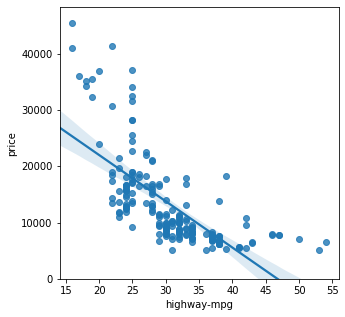

In [12]:
#visualization of price to mpg models using a regression (reg) plot
%matplotlib inline

width = 5
height = 5
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg", y = "price", data = df)
plt.ylim(0,)
#the ylim sets the limits of the yaxis at zero up to th largest data point; observe non linear behaviour

(0, 47431.73866061525)

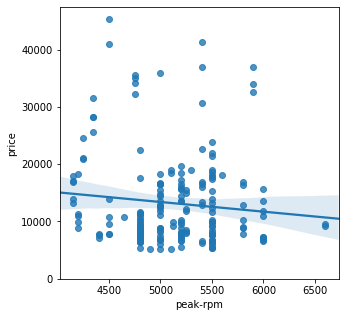

In [13]:
width = 5
height = 5
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm", y = "price", data = df)
plt.ylim(0,)
#definitely not linear

(0, 33129.93533408737)

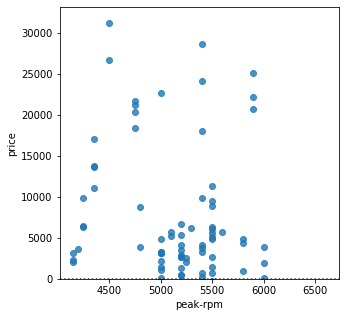

In [14]:
#residual plot shows a non zero mean & clustering; not evenly spread
width = 5
height = 5
plt.figure(figsize=(width,height))
sns.residplot(df['peak-rpm'], df['price'])
plt.ylim(0,)


In [15]:
#the price_engine is a regression based on price and 4 other attributes; passing these attributes to predict
#gives price predictions based on the 4 variables on every row
price_prediction = price_engine.predict(add_predictors)

#view the first 5 rows
price_prediction[0:5]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

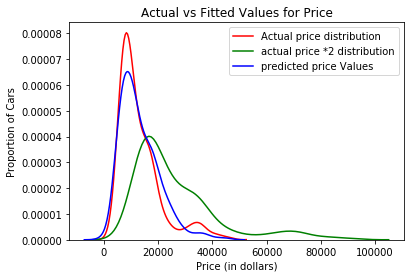

In [16]:
#creates distribution plot using price & price *2
p1 = sns.distplot(df['price'], hist=False, color="r", label="Actual price distribution")
p2 = sns.distplot(df['price']*2, hist=False, color="g", label="actual price *2 distribution")

#creates distribution plot using the price_prediction data frame which has predicted values of price 
#based on the 4 variabes chosen earlier  
sns.distplot(price_prediction, hist=False, color="b", label="predicted price Values" , ax=p1)
#sns.distplot(price_prediction, hist=False, color="g", label="Fitted Values" , ax=p2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [17]:
#plotting a polynomial regression
#the function PlotPolly receives a polynomial regression equation(of order 2 and above), 2 (non-linearly correlated) dataframes 
#and a Name for the x-axis
#Because the residual plot from above showed non linear behaviour it will need a polynomial solution
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    
    #creates array of 100 equally space random numbers between 15 and 55 
    x_new = np.linspace(15, 55, 100)
    #uses x_new input into nth order equation (passed from outside function, a linear regression model for example)
    #and stored in y_new
    y_new = model(x_new)

    #plot draws scatter plot of independent_variable and dependent_variabble (non-linearly correlated) dataframes;
    #the dot is for data to appear as points;
    #the plot then draws the points of the randomised number array x_new against 
    #the modelled output for that x_new, these points are joined by a line
    #hence the '-' notation at the end
    
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    #gca means get current axis or create one
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    #gca means get current figure or create one
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [18]:
#(non-linearly correlated) dataframes of variables to be inputted into polynomial function
x = df['highway-mpg']
y = df['price']


In [19]:
#polyfit accepts x,y as inputs, since linear did not cut it, the number at the end has to be greater than 1
#2 offers a quadratic solution, 3 a polynomial ie power 3, etc
#output is an array of coefficients based on the solution; 3 = array of 3 coefficients
new_fit= np.polyfit(x,y,3)

#coefficients from newfit are passed here and assigned their respective x and y variables
#that's the number 1 in poly1d; not the letter el.
eqn = np.poly1d(new_fit)
print(eqn)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


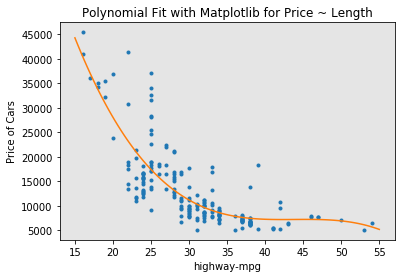

In [20]:
#calls the PlotPolly functioned defined earlier
#blue dots are for the price vs highway mpg data points
#because we know its a non-linear solution
#the orange line plots the nth order solution as defined in the polyfit statement above starting at 15mpg to 55mpg
PlotPolly(eqn,x,y,'highway-mpg')

In [21]:
#at this point, we have two solutions to predict the price
#the first is based on a linear combination of variables deduced from heatmap and .corr of all the variable
#upon which we settled on 4 variables; the solution was a linear equation combining those variables to predict the price
print("the coeffs of the linear solution are", price_engine.coef_, "\t", "the intercept is", price_engine.intercept_, "\n")

#the second solution is a non linear 3rd order polynomial solution to predict price based on only the highway-mpg
print("this is the non-linear solution", "\n", eqn)


the coeffs of the linear solution are [53.49574423  4.70770099 81.53026382 36.05748882] 	 the intercept is -15806.624626329198 

this is the non-linear solution 
         3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [22]:
#the difference between order 3 and order 2 solution
#plotting a polynomial regression
#the function PlotPolly receives a polynomial regression equation(of order 2 and above), 2 (non-linearly correlated) dataframes 
#and a Name for the x-axis
#Because the residual plot is non linear it will need a polynomial solution
def PlotPolly1(model_1,model_2, independent_variable, dependent_variabble, Name):
    
    #creates array of 100 equally space random numbers between 15 and 55 
    x_new = np.linspace(15, 55, 100)
    #uses x_new input into nth order equation (passed from outside function, a linear regression model for example)
    #and stored in y_new
    y_new = model_1(x_new)
    y_new2 = model_2(x_new)
    

    #plot draws scatter plot of independent_variable and dependent_variabble (non-linearly correlated) dataframes;
    #the dot is for data to appear as points;
    #the plot then draws the points of the randomised number array x_new against 
    #the modelled output for that x_new, these points are joined by a line
    #hence the '-' notation at the end
    
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-', x_new, y_new2, 'x')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    #gca means get current axis or create one
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    #gca means get current figure or create one
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.ylim(0,60000)

    plt.show()
    plt.close()

In [23]:
#combining the steps and code from above and making appropriate changes 
#(non-linearly correlated) dataframes of variables to be inputted into polynomial function
x = df['highway-mpg']
y = df['price']


#polyfit accepts x,y as inputs, since linear did not cut it, the number at the end has to be greater than 1
#2 offers a quadratic solution, 3 a polynomial ie power 3, etc
#output is an array of coefficients based on the solution; 3 = array of 3 coefficients
new_fit= np.polyfit(x,y,2)
new_fit2=np.polyfit(x,y,5)

#coefficients from newfit are passed here and assigned their respective x and y variables
#that's the number 1 in poly1d; not the letter el.
eqn = np.poly1d(new_fit)
eqn2 = np.poly1d(new_fit2)
print(eqn2)


           5         4        3        2
-0.006998 x + 1.223 x - 84.3 x + 2908 x - 5.152e+04 x + 3.954e+05


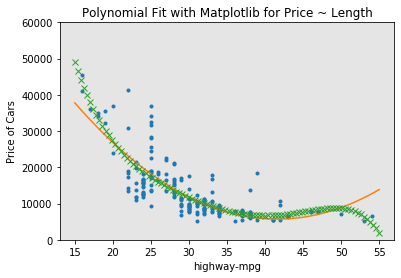

In [24]:
#using plotpolly1 its easy to demonstrate why a higher order solution is more accurate as it better follows the data set
PlotPolly1(eqn,eqn2,x,y,'highway-mpg')

In [25]:
#Python documentation: For example, if an input sample is two dimensional and of the form [a, b],
#the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
#limits the solution to a degree 2 solution 
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [26]:
#improves normal distribution of data; minimizes skew
#creates new features based on the 4 features in added-predictions
add_predictors_pr = pr.fit_transform(add_predictors)

In [27]:
#original array had 4 columns
add_predictors.shape

(201, 4)

In [28]:
#transformed array has 14 columns
#15 columns from relationships between the 4 variables
#this shows first row of the features columns
add_predictors_pr[0:1]


array([[1.000000e+00, 1.110000e+02, 2.548000e+03, 1.300000e+02,
        2.700000e+01, 1.232100e+04, 2.828280e+05, 1.443000e+04,
        2.997000e+03, 6.492304e+06, 3.312400e+05, 6.879600e+04,
        1.690000e+04, 3.510000e+03, 7.290000e+02]])

In [29]:
#shows first row of original df
add_predictors[0:1]

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27


In [30]:
#15 columns and 201 rows
add_predictors_pr.shape

(201, 15)

In [31]:
#a pipeline allows a series of transformations on the data
#a standard scaler standardizes features by removing the mean 
#and scaling it to unit variance
#the pipeline applies steps 1-3
#1)scaling transformation (normalize the data and make it more 'normal')
#2)polynomial features transformation
#3)linear regression model (to give us the relationship we want)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#input is a list of the transformation objects, 1)a scaler(defined above), 2)polynomial features and a linear regression model
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

In [32]:
#this line feeds the list of transformations into the pipeline object
#called pipe
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [33]:
#list of transformations is 'applied to the 
#predictors variables(add_predictors)
#and the price
#at this point I could different choose predictor variables based on 
#an heatmap with new data; or maybe its not price, i want to predict

pipe.fit(add_predictors,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [34]:
#predict prices based on the transformations applied by the pipeline
#produces a list array of predicted prices based on the prediction variables
pipe_predict=pipe.predict(add_predictors)
pipe_predict[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [35]:
#shows we have 201 predicted prices
pipe_predict.shape

(201,)

In [36]:
#calculated rsquared
lm.fit(mpg, the_price)

print('the r-squared is: ', lm.score(mpg,the_price))


the r-squared is:  0.4965911884339175


In [37]:
#this predicts the prices using the mpg
price_predict=lm.predict(mpg)
print('The output of the first four predicted value is: ', price_predict[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
#this finds the MSE of the price 
#and the predicted price based on the regression of mpg and price
#lower is better
mse = mean_squared_error(df['price'], price_predict)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [40]:
#fits a linear regression model between the predictor variables 
#and the actual price
lm.fit(add_predictors, df['price'])

#there is an improved r2 in using more predictor variables
print('The R-square is: ', lm.score(add_predictors, df['price']))


The R-square is:  0.8093562806577457


In [41]:
#to calculate the MSE we have to create a prediction
price_predict2 = lm.predict(add_predictors)

#print the MSE between the actual price and predicted price
print('The mean square error of price and predicted value' , \
      'using multifit is: ', \
      mean_squared_error(df['price'], price_predict2))
#result improved by 37%; no need to calculate coefficiencts and equations

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [42]:
from sklearn.metrics import r2_score

In [43]:
#this line checks the rsquared between the price and the 
#polynomial fit of the price (equation order 5 in our case as defined in Polly&Polly2)
#switching between eqn&eqn2 shows increased accuracy between 3rd &5th order solutions
r_squared = r2_score(y,eqn2(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6788068173943986


In [44]:
#print the MSE between the actual price and predicted price
print('The mean square error of price and predicted value' , \
      'using polyfit is: ', \
      mean_squared_error(df['price'], eqn2(x)))


The mean square error of price and predicted value using polyfit is:  20184311.223404024


In [45]:
#time to plot some predictions
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [70]:
#the reshape changes the array from (99rowsx1column) to (1rowx99column)
new_input1 = np.arange(1, 100,1).reshape(1,-1)

In [73]:
np.size(new_input1,1)

99

In [99]:
lm.fit(mpg,the_price)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
np1 = lm.predict(new_input1)
np1[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

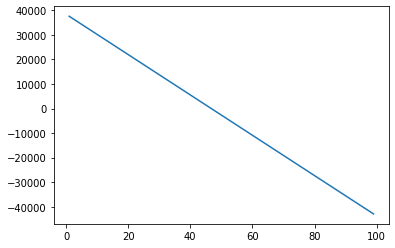

In [102]:
plt.plot(new_input1,np1)
plt.show()

In [2]:
#model evaluation
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

#save the data back to folder
df.to_csv('/Users/phillipmachoka/Desktop/pythonn/Data Analysis w Python/module5data.txt')

In [4]:
df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
%%capture
! pip install ipywidgets

In [7]:
#these are for graphical reasons

import seaborn as sns

from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [8]:
#this is a function that receives two data frames to test
#the names of the data frames and a titel for the chart
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

#plots distribution ax1 of the red function
#plots the distribution of the blue function ax2, using the same axis as ax1 
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [9]:
#this fuction receives 4 data frames, a linear regression model and 
#and polynomial transformation equation

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    #a dataframe of the maximum values of the xtrain and xtest dataframes
    xmax=max([xtrain.values.max(), xtest.values.max()])
    #a dataframe of the minimum values of the xtrain and xtest dataframes
    xmin=min([xtrain.values.min(), xtest.values.min()])
    #arranges the dataframes of between the min value and max values 
    #separated by a difference of 0.1
    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    
    #[my hypothesis on the] actions in order; predict outcome of brackets; poly transform is a model
    #reshape the x array from row-orientated to column-orientated see line 70 for transformation to array
    #fit returns mean and sd
    #transform converts linear model (1 coefficient, y = ax+b) to non-linear model with n-1 coefficients(n degree coefficients)
    #fit_transform = returns 'clean' coefficients for non-linear model
    #predict, gives us an array with the results of plugging x into the non-linear model 'poly_transform'
    #x can be a predictor variable or a group of predictor variables for the target variable
     
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [10]:
#training and testing

#price data
y_data = df['price']

#drop price data from data frame
x_data=df.drop('price',axis=1)

In [11]:
from sklearn.model_selection import train_test_split

#splits data set 75% training data; 15% test data for the x and y dataframes
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170
